In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#use seaborn plotting defaults
import seaborn as sns; sns.set()

# Тест KMeans
### 4 Кластери на згенерованих даних

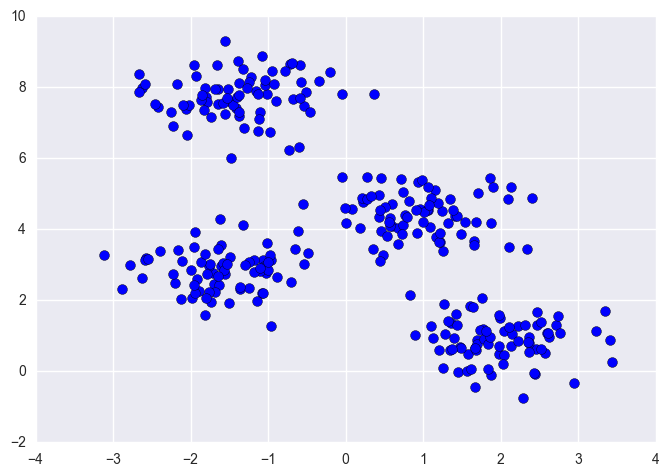

In [25]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.6)
plt.scatter(X[:,0], X[:,1], s=50);

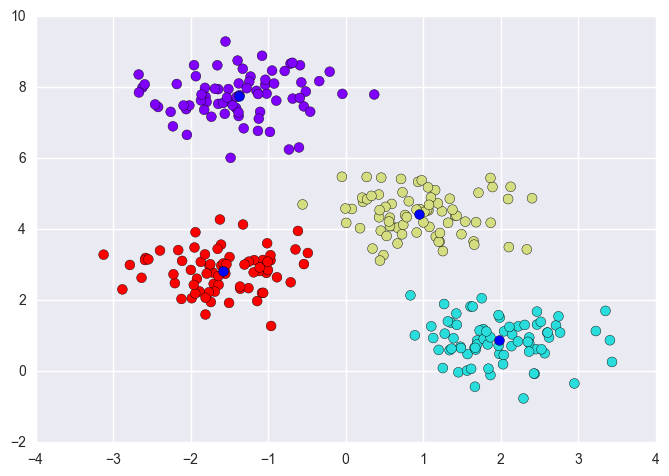

In [37]:
from sklearn.cluster import KMeans
est = KMeans(4)
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='rainbow');
plt.scatter(est.cluster_centers_[:,0], est.cluster_centers_[:,1], s=50, cmap='jet');

# Застосування KMeans для кластеризації десяткових чисел

In [52]:
from sklearn.datasets import load_digits
digits = load_digits()

In [39]:
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

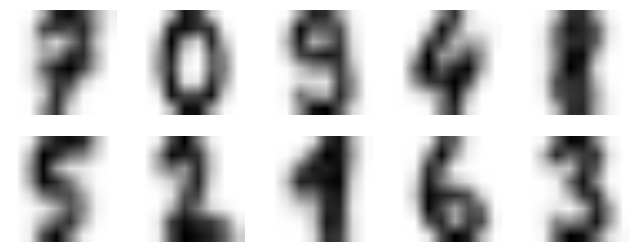

In [42]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

In [44]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.79187534780189206

## Виведемо матрицю помилок

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 154   0   2   0   7   7  13]
 [  0   5   0   0 164   0   0   8   4   0]
 [  0   0   0   2   2 136   1   0   0  41]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   1   0 174   2   0]
 [  0   6   3   2   0   6   2   3 100  52]
 [  0  20   0   7   0   7   0   7   1 138]]


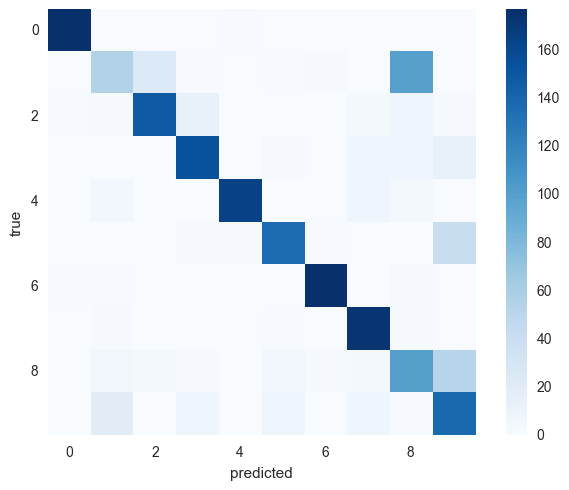

In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');